# 2. Preprocessing

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from itertools import combinations_with_replacement

## 2.1. Load and overview data

Let's start by loading the data train and test data.

In [230]:
raw_training_data = pd.read_hdf('raw_training_data.h5', 'data')
raw_test_data = pd.read_hdf('raw_test_data.h5', 'data')

Let's shows few caracteristics of the data:

1. 5 first rows

In [231]:
raw_training_data.head()

,environment_identifier,signal_identifier,x,y,time,value,diffusion_coefficient,source_x,source_y
0,0,0,5.0,5.0,0.0,0.900000,0.1,5.0,5.0
1,0,0,5.0,5.0,0.1,0.902500,0.1,5.0,5.0
2,0,0,5.0,5.0,0.2,0.904750,0.1,5.0,5.0
3,0,0,5.0,5.0,0.3,0.906783,0.1,5.0,5.0
4,0,0,5.0,5.0,0.4,0.908626,0.1,5.0,5.0


In [232]:
raw_test_data.head()

,environment_identifier,signal_identifier,x,y,time,value,diffusion_coefficient,source_x,source_y
0,0,0,5.0,5.0,0.0,0.900000,0.1,5.0,5.0
1,0,0,5.0,5.0,0.1,0.902500,0.1,5.0,5.0
2,0,0,5.0,5.0,0.2,0.904750,0.1,5.0,5.0
3,0,0,5.0,5.0,0.3,0.906783,0.1,5.0,5.0
4,0,0,5.0,5.0,0.4,0.908626,0.1,5.0,5.0


2. Data description

In [233]:
raw_training_data.describe()

,environment_identifier,signal_identifier,x,y,time,value,diffusion_coefficient,source_x,source_y
count,1.105847e+07,1.105847e+07,1.105847e+07,1.105847e+07,1.105847e+07,1.105847e+07,1.105847e+07,1.105847e+07,1.105847e+07
mean,7.468131e+01,1.943926e+01,9.516359e+00,1.096466e+01,9.990000e+01,1.205300e-01,6.268800e-01,8.264190e+00,1.167345e+01
std,4.288745e+01,1.277356e+01,2.340647e+00,2.190334e+00,5.770615e+01,1.429944e-01,2.711592e-01,3.064463e+00,3.121481e+00
min,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,5.000000e+00,5.000000e+00
25%,3.775000e+01,9.000000e+00,7.750000e+00,9.500000e+00,4.990000e+01,2.198303e-02,4.000000e-01,5.000000e+00,1.000000e+01
50%,7.400000e+01,1.800000e+01,9.625000e+00,1.100000e+01,9.990000e+01,6.931738e-02,7.000000e-01,7.500000e+00,1.250000e+01
75%,1.120000e+02,2.900000e+01,1.125000e+01,1.250000e+01,1.499000e+02,1.686445e-01,9.000000e-01,1.000000e+01,1.500000e+01
max,1.490000e+02,5.500000e+01,1.550000e+01,1.550000e+01,1.998000e+02,9.603586e-01,1.000000e+00,1.500000e+01,1.500000e+01


In [234]:
raw_test_data.describe()

,environment_identifier,signal_identifier,x,y,time,value,diffusion_coefficient,source_x,source_y
count,347826.000000,347826.000000,347826.000000,347826.000000,347826.000000,347826.000000,347826.000000,347826.000000,347826.000000
mean,76.258621,0.367816,7.988506,12.011494,99.900000,0.153329,0.701293,8.333333,11.666667
std,42.644095,0.627254,4.577549,4.577549,57.706235,0.260044,0.287619,3.036342,3.036342
min,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.100000,5.000000,5.000000
25%,38.000000,0.000000,5.000000,5.000000,49.900000,0.014539,0.550000,5.000000,10.000000
50%,78.000000,0.000000,5.000000,15.000000,99.900000,0.044717,0.775000,7.500000,12.500000
75%,114.000000,1.000000,15.000000,15.000000,149.900000,0.122312,1.000000,10.000000,15.000000
max,149.000000,3.000000,15.000000,15.000000,199.800000,0.960359,1.000000,15.000000,15.000000


3. Data general information

In [235]:
raw_training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11058468 entries, 0 to 11058467
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   environment_identifier  int64  
 1   signal_identifier       int64  
 2   x                       float64
 3   y                       float64
 4   time                    float64
 5   value                   float64
 6   diffusion_coefficient   float64
 7   source_x                float64
 8   source_y                float64
dtypes: float64(7), int64(2)
memory usage: 843.7 MB


In [236]:
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347826 entries, 0 to 347825
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   environment_identifier  347826 non-null  int64  
 1   signal_identifier       347826 non-null  int64  
 2   x                       347826 non-null  float64
 3   y                       347826 non-null  float64
 4   time                    347826 non-null  float64
 5   value                   347826 non-null  float64
 6   diffusion_coefficient   347826 non-null  float64
 7   source_x                347826 non-null  float64
 8   source_y                347826 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 26.5 MB


## 2.2. Data preprocessing

To do some analysis on the data, we need to compute some statistics that will summarize the signal. We will compute the following statistics:
- Mean
- Standard deviation
- Median
- Maximum
- Skewness : measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
- Kurtosis : measure of the "tailedness" of the probability distribution of a real-valued random variable
- Shift : measure the time it takes for the gas to reach a certain distance from the sensor.

The following features will not be computed:
- Minimum : does not provide any information since all the signals are normalized

The first feature are easy to compute, but the shift is a bit more complicated. To compute the shift, we will use different methods:

1. For non-monotonic signals, we will use the peak of the correlation function between the signal and the first signal of the training set.
    $$
    \text{corr}(f, g)(k) = \sum_{i=1}^{N} f(i) \cdot g(i+k)
    $$
    where:
    - $f$ and $g$ are two functions representing discrete signals
    - $k$ is the relative offset between the two functions
    - $N$ is the length of the signals
    Since this kind of operation is very expensive, we will use the Fast Fourier Transform to calculate the correlation function.
    $$
    \text{corr}(f, g)(k) = \mathcal{F}^{-1}(\mathcal{F}(f) \cdot \mathcal{F}(g)^*)
    $$
    where:
    - $f$ and $g$ are zero-padded to the same length
    - $k$ is the relative offset between the two signals
    The the maximum of the correlation function correspond to where the two signals are the most similar. This is the relative offset between the two signals.
    $$
    \text{relative offset} = \text{argmax}(\text{corr}(f, g)(k))
    $$

In [237]:
def get_relative_shift_non_monotonic(signal_1, signal_2):
    """
    Get the relative offset between two signals using cross-correlation
    """

    # - Normalize the signals (necessary for monotonic signals)
    signal_1 = MinMaxScaler().fit_transform(signal_1.reshape(-1, 1)).flatten()
    signal_2 = MinMaxScaler().fit_transform(signal_2.reshape(-1, 1)).flatten()
   
    # Compute the fourier transform of the signals
    A = np.fft.fft(signal_1)
    B = np.fft.fft(signal_2)

    # Compute the cross-correlation
    cross_correlation = np.fft.ifft(A.conjugate() * B)

    # Get the offset of the maximum value of the cross-correlation
    offset = np.argmax(np.abs(cross_correlation))

    return offset

2. For monotonic signals, we will use the time it takes for the signal to reach a certain distance from the sensor. We will use the following formula:
    $$
    \text{shift} = \frac{1}{N} \sum_{i=1}^{N} i \cdot f(i)
    $$
    where:
    - $f$ is the signal
    - $N$ is the length of the signal

In [238]:
def get_relative_shift_monotonic(signal1, signal2):
    len1 = len(signal1)
    len2 = len(signal2)
    
    if len1 > len2:
        signal1, signal2 = signal2, signal1
        len1, len2 = len2, len1
    
    min_error = float('inf')
    best_shift = 0
    
    for shift in range(len2 - len1 + 1):
        error = np.sum((signal1 - signal2[shift:shift+len1])**2)
        if error < min_error:
            min_error = error
            best_shift = shift

    print(f"Best shift: {best_shift}")
            
    return best_shift

In [239]:
def get_relative_shifts(values):
    """
    Get the relative offsets between a list of signals
    where the first signal is the reference signal.
    The axis 0 of the signals array should be the sensors
    and the axis 1 should be the time.
    """

    pivoted_values = values.pivot(index="signal_identifier", columns="time", values="value")

    # We use the first signal as a reference but we could use any other signal
    reference_signal = pivoted_values.values[0]
    
    n, p = pivoted_values.values.shape

    results = pd.DataFrame({
        "signal_identifier": pivoted_values.index,
        "shift": np.zeros(n)
    })

    # Skip the reference signal since the offset is 0
    for index, row in pivoted_values.iterrows():
        results.loc[index, "shift"] = get_relative_shift_non_monotonic(reference_signal, row.values)


    return results

Create the new dataset with computed values.

In [240]:
def process_data(raw_data):
    """
    Process the raw data to extract the features according to the environment and the signal identifiers.

    # Parameters
    
    - raw_data (pd.DataFrame): The raw data to process

    # Returns
    - processed_data (pd.DataFrame): The processed data    
    """

    # - General signal statistics

    # Group the raw data by environment and signal identifier some statistics
    grouped_by_signal = raw_data.groupby(["environment_identifier", "signal_identifier"])

    # Compute the statistics for each group by aggregating the signal values
    processed_data = grouped_by_signal.agg({
        'value': ['sum',                    # Sum of the signal values
                    'mean',                 # Mean of the signal values
                    'std',                  # Standard deviation of the signal values
                    'max',                  # Maximum value of the signal values
                    'median',               # Median value of the signal values
                    sp.stats.kurtosis,      # Kurtosis of the signal values (how peaked the distribution is)
                    sp.stats.skew],         # Skewness of the signal values (how symmetrical the distribution is)
        "x": "first",                       # Since the x coordinate is the same for all sensor measurements in the same environment, we can take the first value
        "y": "first",                       # Since the y coordinate is the same for all sensor measurements in the same environment, we can take the first value
        "source_x": "first",                # Since the source x coordinate is the same for all sensors in the same environment, we can take the first value
        "source_y": "first",                # Since the source y coordinate is the same for all sensors in the same environment, we can take the first value
        "diffusion_coefficient": "first"    # Since the diffusion coefficient is the same for all sensors in the same environment, we can take the first value
    }).reset_index()

    # Set the column names
    processed_data.columns = ["environment_identifier", "signal_identifier", "value_sum", "value_mean", "value_std", "value_max", "value_median", "value_kurtosis", "value_skew", "x", "y", "source_x", "source_y", "diffusion_coefficient"]

    # - Distance to the source

    # Compute the euclidean distance between the source and the sensor
    processed_data["distance"] = np.linalg.norm(processed_data[["x", "y"]].values - processed_data[["source_x", "source_y"]].values, axis=1)

    # - Signal statistics relative to other signals in the same environment

    # Group the processed data by environment
    grouped_by_environment = raw_data.groupby("environment_identifier")

    # Compute the relative shifts between the signals in the same environment for all environments
    relative_shifts = grouped_by_environment.apply(get_relative_shifts, include_groups=False)

    # Merge the relative shifts with the processed data
    processed_data = processed_data.merge(relative_shifts, on=["environment_identifier", "signal_identifier"], how="left")

    return processed_data

Let's now compute the statistics for the training and test dataset.

In [241]:
processed_training_data = process_data(raw_training_data)
processed_test_data = process_data(raw_test_data)

Plot first one random environment signals to see the difference between the original signal and the shifted signal.

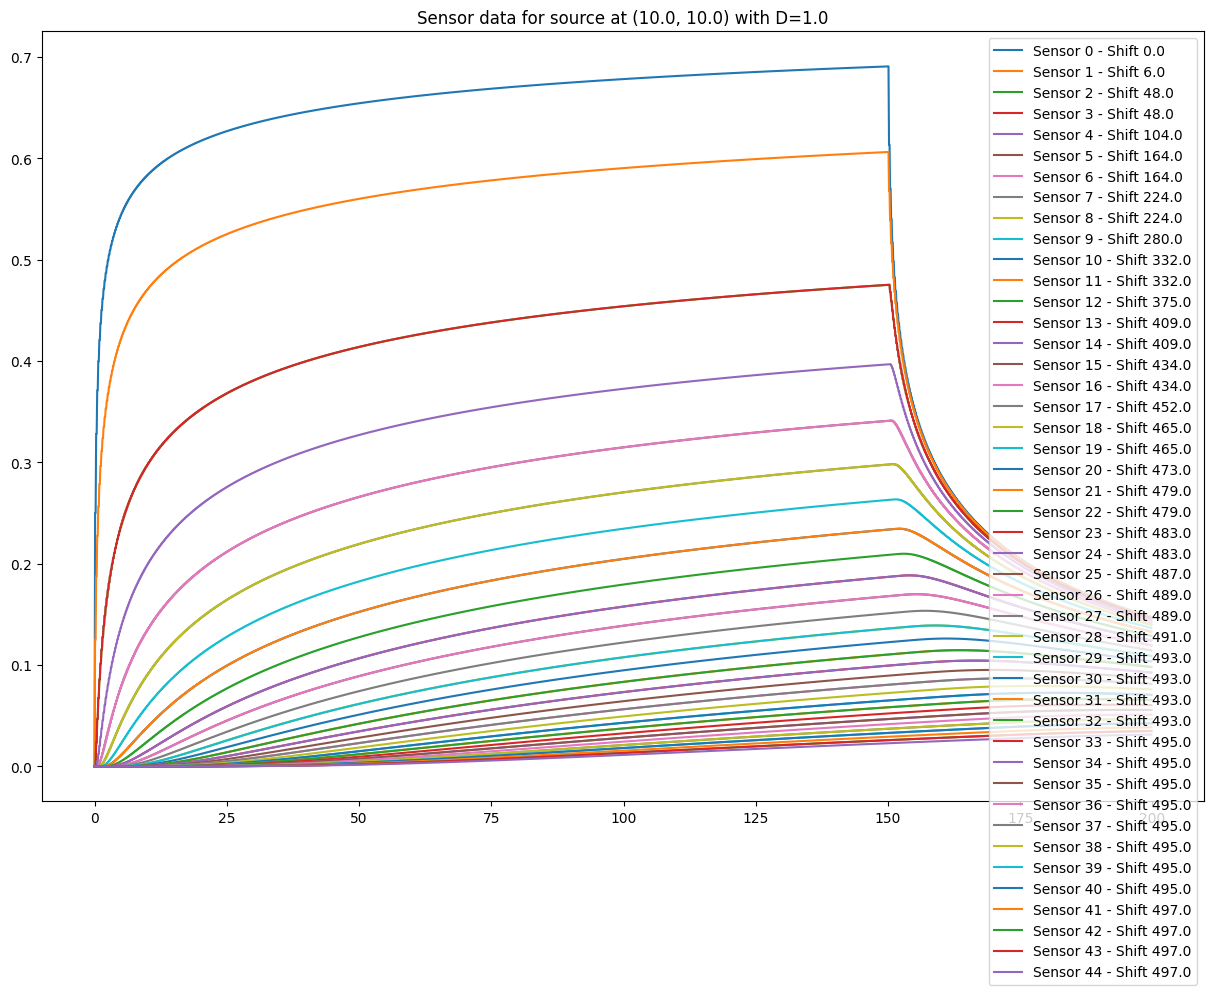

In [242]:
environment_index = 99

raw = raw_data[raw_training_data["environment_identifier"] == environment_index]

raw_pivoted = raw.pivot(index="signal_identifier", columns="time", values="value")

processed = processed_training_data[processed_training_data["environment_identifier"] == environment_index]

plt.figure(figsize=(15, 10))

for raw_index, p in zip(raw_pivoted.index, processed["shift"]):
    plt.plot(raw_pivoted.columns, raw_pivoted.iloc[raw_index], label=f"Sensor {raw_index} - Shift {p}")

plt.title(f"Sensor data for source at ({processed['source_x'].values[0]}, {processed['source_y'].values[0]}) with D={raw['diffusion_coefficient'].values[0]}")
plt.legend()
plt.show()

Export the new datasets to HDF5 files.

In [243]:
print("Exporting training data:")
print(processed_training_data.info())

processed_training_data.to_hdf('processed_training_data.h5', key='data', mode='w')

print("Exporting test data:")
print(processed_test_data.info())
processed_test_data.to_hdf('processed_test_data.h5', key='data', mode='w')

Exporting training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5532 entries, 0 to 5531
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   environment_identifier  5532 non-null   int64  
 1   signal_identifier       5532 non-null   int64  
 2   value_sum               5532 non-null   float64
 3   value_mean              5532 non-null   float64
 4   value_std               5532 non-null   float64
 5   value_max               5532 non-null   float64
 6   value_median            5532 non-null   float64
 7   value_kurtosis          5532 non-null   float64
 8   value_skew              5532 non-null   float64
 9   x                       5532 non-null   float64
 10  y                       5532 non-null   float64
 11  source_x                5532 non-null   float64
 12  source_y                5532 non-null   float64
 13  diffusion_coefficient   5532 non-null   float64
 14  distance       